In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import seaborn as sn
sn.set(style='whitegrid')






In [2]:
data_clean_train = pd.read_csv("housing_train_clean.csv")
data_clean_test = pd.read_csv('housing_test_clean.csv')

In [3]:
data_clean_train

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond_Fa,...,Street_Grvl,Street_Pave,TotRmsAbvGrd,TotalBsmtSF,Utilities_AllPub,Utilities_NoSeWa,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,True,False,False,False,False,False,...,False,True,8,856,True,False,0,2003,2003,2008
1,1262,0,0,3,True,False,False,False,False,False,...,False,True,6,1262,True,False,298,1976,1976,2007
2,920,866,0,3,True,False,False,False,False,False,...,False,True,6,920,True,False,0,2001,2002,2008
3,961,756,0,3,True,False,False,False,False,False,...,False,True,7,756,True,False,0,1915,1970,2006
4,1145,1053,0,4,True,False,False,False,False,False,...,False,True,9,1145,True,False,192,2000,2000,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,953,694,0,3,True,False,False,False,False,False,...,False,True,7,953,True,False,0,1999,2000,2007
1456,2073,0,0,3,True,False,False,False,False,False,...,False,True,7,1542,True,False,349,1978,1988,2010
1457,1188,1152,0,4,True,False,False,False,False,False,...,False,True,9,1152,True,False,0,1941,2006,2010
1458,1078,0,0,2,True,False,False,False,False,False,...,False,True,5,1078,True,False,366,1950,1996,2010


In [4]:
Y_train = data_clean_train["SalePrice"]
Y_train

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [5]:
X_train = data_clean_train

In [6]:
X_train.drop(["SalePrice"], axis=1, inplace=True)

In [7]:
X_train

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond_Fa,...,Street_Grvl,Street_Pave,TotRmsAbvGrd,TotalBsmtSF,Utilities_AllPub,Utilities_NoSeWa,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,True,False,False,False,False,False,...,False,True,8,856,True,False,0,2003,2003,2008
1,1262,0,0,3,True,False,False,False,False,False,...,False,True,6,1262,True,False,298,1976,1976,2007
2,920,866,0,3,True,False,False,False,False,False,...,False,True,6,920,True,False,0,2001,2002,2008
3,961,756,0,3,True,False,False,False,False,False,...,False,True,7,756,True,False,0,1915,1970,2006
4,1145,1053,0,4,True,False,False,False,False,False,...,False,True,9,1145,True,False,192,2000,2000,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,953,694,0,3,True,False,False,False,False,False,...,False,True,7,953,True,False,0,1999,2000,2007
1456,2073,0,0,3,True,False,False,False,False,False,...,False,True,7,1542,True,False,349,1978,1988,2010
1457,1188,1152,0,4,True,False,False,False,False,False,...,False,True,9,1152,True,False,0,1941,2006,2010
1458,1078,0,0,2,True,False,False,False,False,False,...,False,True,5,1078,True,False,366,1950,1996,2010


In [8]:
data_clean_test

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond_Fa,...,Street_Grvl,Street_Pave,TotRmsAbvGrd,TotalBsmtSF,Utilities_AllPub,Utilities_NoSeWa,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,896,0,0,2,1,0,0,0,0,0,...,0,1,5,882.0,1,0,140,1961,1961,2010
1,1329,0,0,3,1,0,0,0,0,0,...,0,1,6,1329.0,1,0,393,1958,1958,2010
2,928,701,0,3,1,0,0,0,0,0,...,0,1,6,928.0,1,0,212,1997,1998,2010
3,926,678,0,3,1,0,0,0,0,0,...,0,1,7,926.0,1,0,360,1998,1998,2010
4,1280,0,0,2,0,0,0,0,1,0,...,0,1,5,1280.0,1,0,0,1992,1992,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,546,546,0,3,0,0,0,1,0,0,...,0,1,5,546.0,1,0,0,1970,1970,2006
1455,546,546,0,3,0,0,0,0,1,0,...,0,1,6,546.0,1,0,0,1970,1970,2006
1456,1224,0,0,4,1,0,0,0,0,0,...,0,1,7,1224.0,1,0,474,1960,1996,2006
1457,970,0,0,3,1,0,0,0,0,0,...,0,1,6,912.0,1,0,80,1992,1992,2006


In [9]:
Y_test = data_clean_test["SalePrice"]
Y_test

0       120376.994315
1       152387.635505
2       185025.193763
3       198385.651258
4       185934.885245
            ...      
1454     85890.984520
1455     83811.680275
1456    160189.586559
1457    115398.604894
1458    224009.963740
Name: SalePrice, Length: 1459, dtype: float64

In [10]:
X_test = data_clean_test

In [11]:
X_test.drop(["SalePrice"], axis=1, inplace=True)

In [12]:
X_test

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond_Fa,...,Street_Grvl,Street_Pave,TotRmsAbvGrd,TotalBsmtSF,Utilities_AllPub,Utilities_NoSeWa,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,896,0,0,2,1,0,0,0,0,0,...,0,1,5,882.0,1,0,140,1961,1961,2010
1,1329,0,0,3,1,0,0,0,0,0,...,0,1,6,1329.0,1,0,393,1958,1958,2010
2,928,701,0,3,1,0,0,0,0,0,...,0,1,6,928.0,1,0,212,1997,1998,2010
3,926,678,0,3,1,0,0,0,0,0,...,0,1,7,926.0,1,0,360,1998,1998,2010
4,1280,0,0,2,0,0,0,0,1,0,...,0,1,5,1280.0,1,0,0,1992,1992,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,546,546,0,3,0,0,0,1,0,0,...,0,1,5,546.0,1,0,0,1970,1970,2006
1455,546,546,0,3,0,0,0,0,1,0,...,0,1,6,546.0,1,0,0,1970,1970,2006
1456,1224,0,0,4,1,0,0,0,0,0,...,0,1,7,1224.0,1,0,474,1960,1996,2006
1457,970,0,0,3,1,0,0,0,0,0,...,0,1,6,912.0,1,0,80,1992,1992,2006


In [13]:
X_train=X_train.values
X_train.shape

(1460, 271)

In [14]:
Y_train=Y_train.values.reshape(-1)
Y_train.shape

(1460,)

In [15]:
X_test=X_test.values
X_test.shape

(1459, 271)

In [16]:
Y_test=Y_test.values
Y_test.shape

(1459,)

In [17]:
scaler=MinMaxScaler()
#get the parameters of the transform
scaler.fit(X_train)
#normalize the features in the training set
X_train_s = scaler.transform(X_train)
#normalize the features in the test set
X_test_s = scaler.transform(X_test)

### KNeighborsRegressor (n_neighbors)

In [18]:
#create a list of possible values of the parameter n_neighbors
n_list=np.arange(1, 100, 10)

In [19]:
param_grid = {'n_neighbors':n_list}

In [20]:
KNR = KNeighborsRegressor()
gs = GridSearchCV(estimator=KNR,
                  param_grid=param_grid,
                  scoring='neg_mean_squared_error',
                  cv=5)

In [21]:
gs.fit(X_train_s, Y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91])},
             scoring='neg_mean_squared_error')

In [22]:
gs.cv_results_

{'mean_fit_time': array([0.00342932, 0.00438781, 0.00396395, 0.00365267, 0.0039793 ,
        0.00317926, 0.00139842, 0.00475121, 0.00358896, 0.00355296]),
 'std_fit_time': array([0.0010287 , 0.00070423, 0.00068874, 0.00551657, 0.00505174,
        0.00282431, 0.00279684, 0.00373272, 0.0005387 , 0.00069587]),
 'mean_score_time': array([0.13257689, 0.07836056, 0.07038479, 0.07295871, 0.06388063,
        0.07731843, 0.07344823, 0.07538948, 0.07473159, 0.07308245]),
 'std_score_time': array([0.13351251, 0.01070593, 0.0091756 , 0.00624499, 0.01269606,
        0.00624505, 0.00863906, 0.00907881, 0.00475765, 0.00879028]),
 'param_n_neighbors': masked_array(data=[1, 11, 21, 31, 41, 51, 61, 71, 81, 91],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 1},
  {'n_neighbors': 11},
  {'n_neighbors': 21},
  {'n_neighbors': 31},
  {'n_neighbors': 41},
  {'n_neig

In [23]:
#we can get the best parameter(s) directly from gs
gs.best_params_ 

{'n_neighbors': 11}

In [24]:
KNR_best = gs.best_estimator_
KNR_best

KNeighborsRegressor(n_neighbors=11)

In [25]:
# test the regressor
Y_test_pred = KNR_best.predict(X_test_s)
# Calculate errors
MSE_KNR = np.mean((Y_test - Y_test_pred)**2)
MAE_KNR = np.mean(np.abs(Y_test - Y_test_pred))
MAPE_KNR =  np.mean(np.abs(Y_test - Y_test_pred)/Y_test)
print('MSE=', MSE_KNR)
print('MAE=', MAE_KNR)
print('MAPE=', MAPE_KNR)

MSE= 1401037435.1593683
MAE= 22916.970691636685
MAPE= 0.12992761754484855


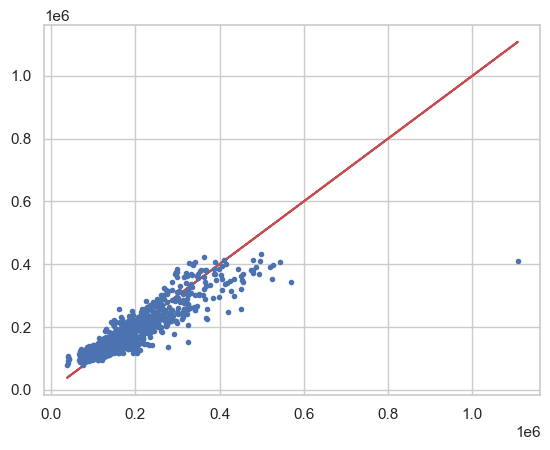

In [26]:
# plot Y_test_pred vs Y_test
fig, ax = plt.subplots()
#the 45-degree line
ax.plot(Y_test, Y_test, '-r')
ax.plot(Y_test, Y_test_pred, '.b')
#if there is no error (mse_test is 0), then the blue dots are on the red line

### DecisionTreeRegressor (max_depth)

In [27]:
#create a list of possible values of the parameter max_depth
depth_list = np.arange(1, 100, 10)

In [28]:
param_grid = {'max_depth':depth_list}

In [29]:
DTR = DecisionTreeRegressor()
gs = GridSearchCV(estimator=DTR,
                  param_grid=param_grid,
                  scoring='neg_mean_squared_error',
                  cv=5)

In [30]:
gs.fit(X_train_s, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91])},
             scoring='neg_mean_squared_error')

In [31]:
gs.cv_results_

{'mean_fit_time': array([0.01907754, 0.12957802, 0.17836375, 0.13856916, 0.16478105,
        0.14510016, 0.1275568 , 0.12336507, 0.12349029, 0.13777862]),
 'std_fit_time': array([0.0064608 , 0.0067034 , 0.01606775, 0.02465179, 0.00981421,
        0.02059465, 0.01530514, 0.01195489, 0.01204153, 0.01751853]),
 'mean_score_time': array([0.00082045, 0.00025401, 0.00125127, 0.00160761, 0.00167441,
        0.00119858, 0.00099678, 0.00103664, 0.        , 0.00060329]),
 'std_score_time': array([7.77756654e-04, 5.08022308e-04, 8.00605732e-04, 7.87759785e-04,
        5.87755311e-04, 3.72878590e-04, 2.38132305e-06, 6.78774387e-04,
        0.00000000e+00, 8.06513376e-04]),
 'param_max_depth': masked_array(data=[1, 11, 21, 31, 41, 51, 61, 71, 81, 91],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 1},
  {'max_depth': 11},
  {'max_depth': 21},
  {'max_depth': 

In [32]:
gs.best_params_ 

{'max_depth': 71}

In [33]:
DTR_best=gs.best_estimator_
DTR_best

DecisionTreeRegressor(max_depth=71)

In [34]:
# test the regressor
Y_test_pred = DTR_best.predict(X_test_s)
# Calculate errors
MSE_DTR = np.mean((Y_test - Y_test_pred)**2)
MAE_DTR = np.mean(np.abs(Y_test - Y_test_pred))
MAPE_DTR =  np.mean(np.abs(Y_test - Y_test_pred)/Y_test)
print('MSE=', MSE_DTR)
print('MAE=', MAE_DTR)
print('MAPE=', MAPE_DTR)

MSE= 1320340592.589819
MAE= 21465.473120220926
MAPE= 0.11883956132064752


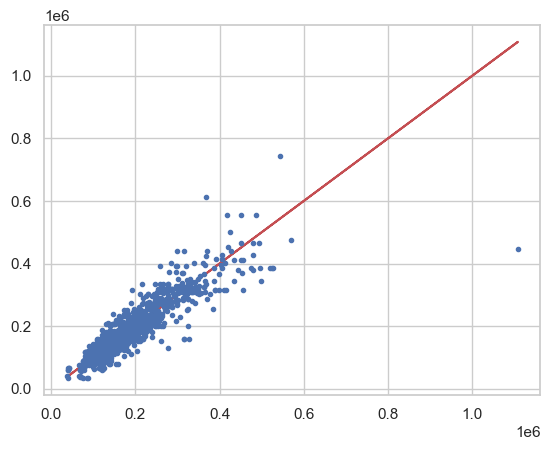

In [35]:
# plot Y_test_pred vs Y_test
fig, ax = plt.subplots()
#the 45-degree line
ax.plot(Y_test, Y_test, '-r')
ax.plot(Y_test, Y_test_pred, '.b')
#if there is no error (mse_test is 0), then the blue dots are on the red line

### RandomForestRegressor (max_depth)

In [36]:
#create a list of possible values of the parameter max_depth
depth_list=np.arange(1, 100, 10)

In [37]:
param_grid = {'max_depth':depth_list}

In [38]:
RFR = RandomForestRegressor()
gs = GridSearchCV(estimator=RFR,
                  param_grid=param_grid,
                  scoring='neg_mean_squared_error',
                  cv=5)

In [39]:
gs.fit(X_train_s, Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': array([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91])},
             scoring='neg_mean_squared_error')

In [40]:
gs.cv_results_

{'mean_fit_time': array([ 0.69287682,  8.03598447, 10.46802526,  9.17122259, 11.00778728,
         9.61585298, 11.43882513, 10.23747859, 10.82565479, 11.52301121]),
 'std_fit_time': array([0.08893857, 1.24304091, 1.20276704, 0.63056701, 1.7000177 ,
        1.00639244, 1.62104006, 1.37121834, 0.83546869, 1.0147435 ]),
 'mean_score_time': array([0.00678253, 0.02317452, 0.02219911, 0.01682816, 0.01821027,
        0.01356211, 0.014364  , 0.01779628, 0.02241707, 0.03103809]),
 'std_score_time': array([0.00574721, 0.00700653, 0.00528226, 0.00857659, 0.01057365,
        0.00695077, 0.00226919, 0.01158043, 0.01204893, 0.01119271]),
 'param_max_depth': masked_array(data=[1, 11, 21, 31, 41, 51, 61, 71, 81, 91],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 1},
  {'max_depth': 11},
  {'max_depth': 21},
  {'max_depth': 31},
  {'max_depth': 41},
  {'max_dept

In [41]:
gs.best_params_ 

{'max_depth': 31}

In [42]:
RFR_best=gs.best_estimator_
RFR_best

RandomForestRegressor(max_depth=31)

In [43]:
# test the regressor
Y_test_pred = RFR_best.predict(X_test_s)
# Calculate errors
MSE_RFR = np.mean((Y_test - Y_test_pred)**2)
MAE_RFR = np.mean(np.abs(Y_test - Y_test_pred))
MAPE_RFR =  np.mean(np.abs(Y_test - Y_test_pred)/Y_test)
print('MSE=', MSE_RFR)
print('MAE=', MAE_RFR)
print('MAPE=', MAPE_RFR)

MSE= 600554557.2855383
MAE= 11052.771107183082
MAPE= 0.062343895437724124


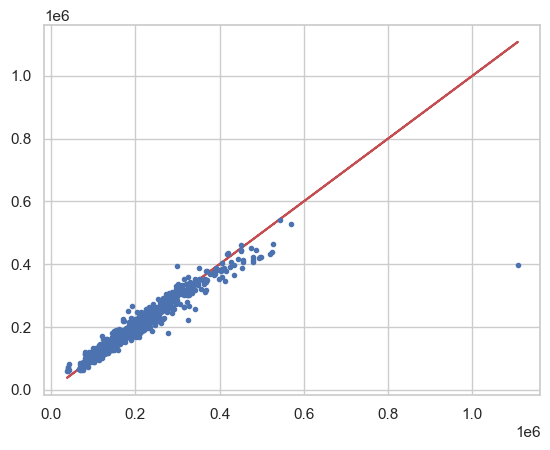

In [44]:
# plot Y_test_pred vs Y_test
fig, ax = plt.subplots()
#the 45-degree line
ax.plot(Y_test, Y_test, '-r')
ax.plot(Y_test, Y_test_pred, '.b')
#if there is no error (mse_test is 0), then the blue dots are on the red line

### Pandas Dataframe Report for MSE, MAE and MAPE


In [45]:
report = {
    '': ['MSE', 'MAE', 'MAPE'],
    'KNeighborsRegressor': [MSE_KNR, MAE_KNR, MAPE_KNR],
    'DecisionTreeRegressor': [MSE_DTR, MAE_DTR, MAPE_DTR],
    'RandomForestRegressor': [MSE_RFR, MAE_RFR, MAPE_RFR]
}

accuracy_df = pd.DataFrame(report)
accuracy_df

,,KNeighborsRegressor,DecisionTreeRegressor,RandomForestRegressor
0,MSE,1.401037e+09,1.320341e+09,6.005546e+08
1,MAE,2.291697e+04,2.146547e+04,1.105277e+04
2,MAPE,1.299276e-01,1.188396e-01,6.234390e-02
